<a href="https://colab.research.google.com/github/aalonsca73/in_silico_toxicology/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

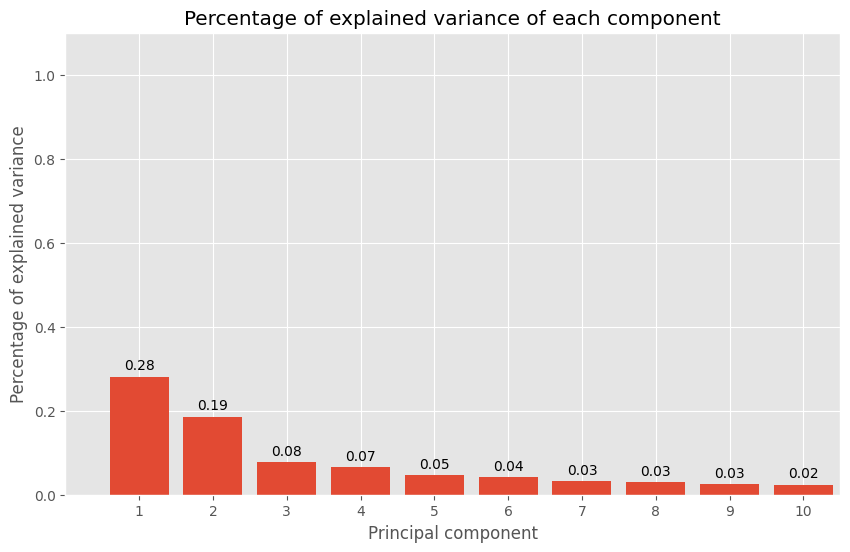

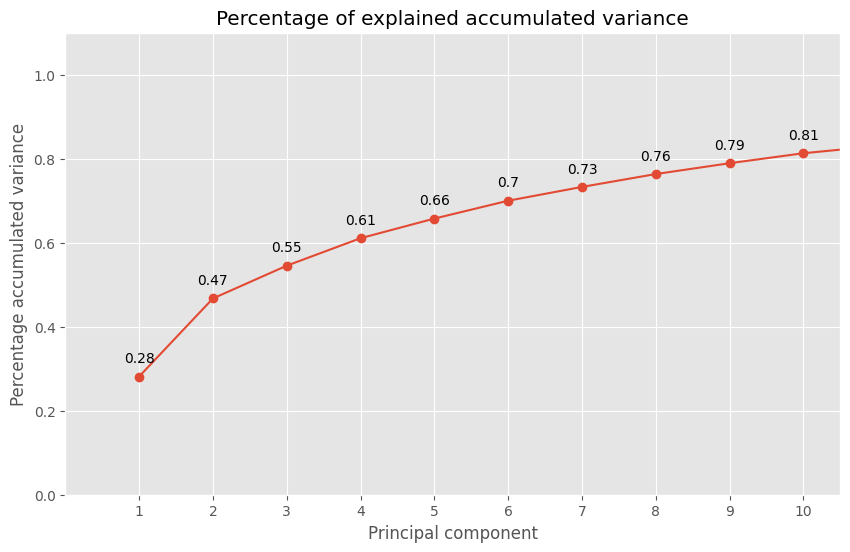

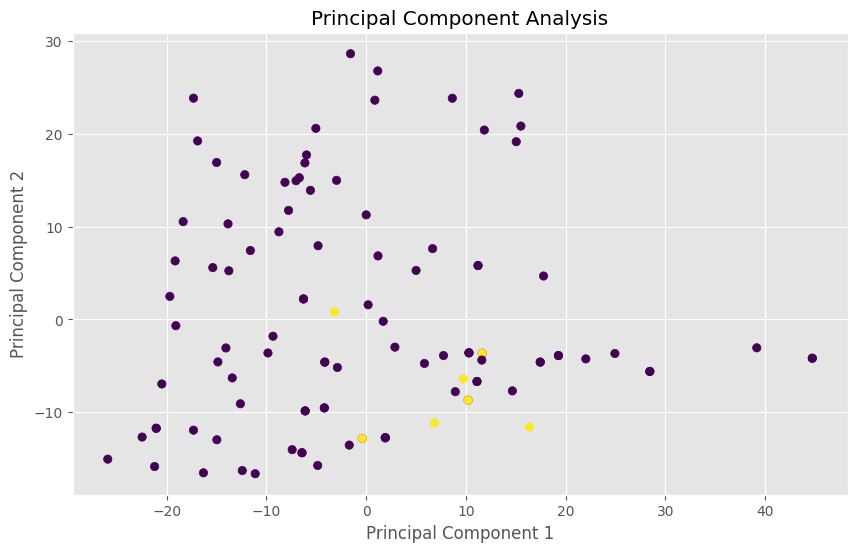

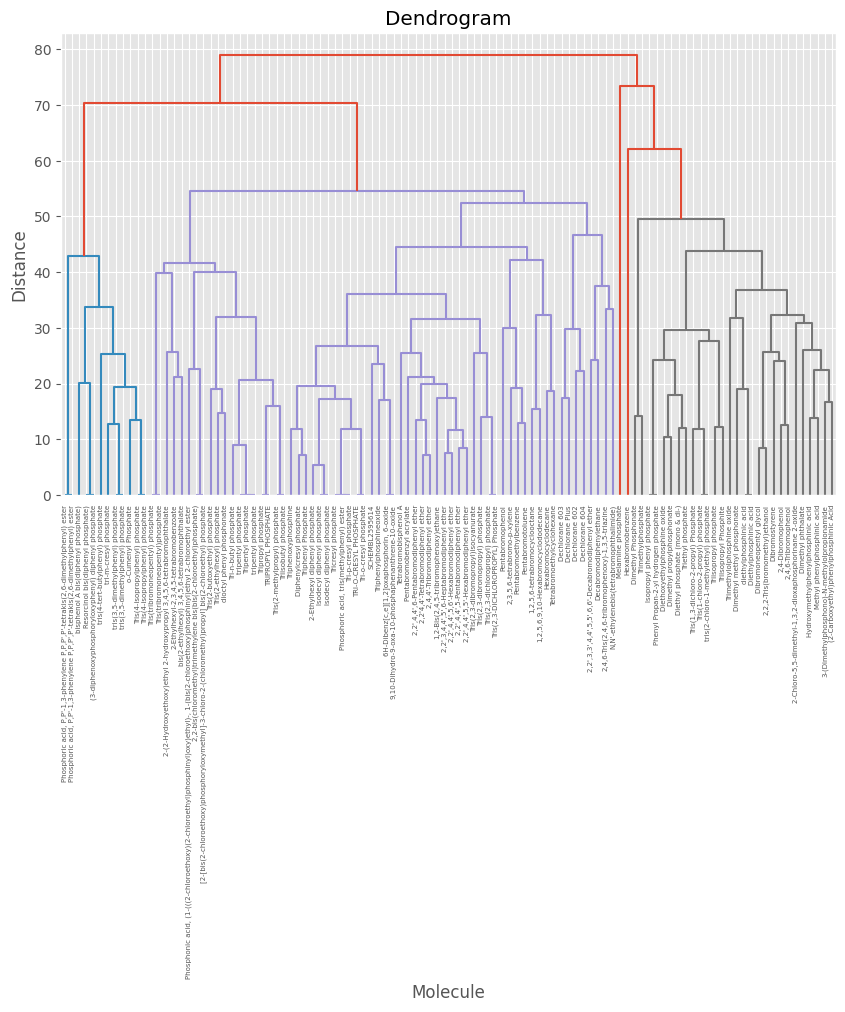

In [4]:
# Define the filename for the CSV file
filename = 'molecules_with_properties_OPFR.csv'
identification = 'label.csv'

# Import necessary libraries
# Data treatment
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Graphics
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style

# Set the style for the plot
style.use('ggplot') # or plt.style.use('ggplot')

# Preprocessing and modeling
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Read the CSV file using pandas
df = pd.read_csv(filename)
labels = pd.read_csv(identification)

# Label to color dict
label_color_dict = {label:idx for idx,label in enumerate(np.unique(labels))}

# Color vector creation
cvec = [label_color_dict[word] for word in labels['label']]

# Remove the 'SMILES' column from the DataFrame
filtered_df = df.loc[:,df.columns != "SMILES"]
# Set the 'Name' column as the index
filtered_df = filtered_df.set_index('Name')

# Training PCA model with scaled data
pca_pipe = make_pipeline(StandardScaler(),PCA())
pca_pipe.fit(filtered_df)

# Extraction of the trained model from the pipeline
pca_model = pca_pipe.named_steps['pca']

# Transformation of the scaled data to obtain Principal Components
transformed_data = pca_pipe.transform(filtered_df)

# Convert array to dataframe
PCA = pd.DataFrame(data=transformed_data)

# Percentage of explained variance of each component
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
ax.bar(x=np.arange(pca_model.n_components_)+1,
       height = pca_model.explained_variance_ratio_)

# Add labels to the bars
for x,y in zip(np.arange(len(filtered_df.columns))+1, pca_model.explained_variance_ratio_):
    label = round(y,2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,5),ha='center')

ax.set_xticks(np.arange(pca_model.n_components_)+1)
ax.set_xlim(0,10.5)
ax.set_ylim(0,1.1)
ax.set_title('Percentage of explained variance of each component')
ax.set_xlabel('Principal component')
ax.set_ylabel('Percentage of explained variance');

# Proportion of accumulated variance
prop_var_accum = pca_model.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,6))
ax.plot(np.arange(len(pca_model.components_))+1,
        pca_model.explained_variance_ratio_.cumsum(), marker = 'o')

# Add labels to the data points
for x,y in zip(np.arange(len(filtered_df.columns))+1,pca_model.explained_variance_ratio_.cumsum()):
  label = round(y, 2)
  ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')

ax.set_xticks(np.arange(pca_model.n_components_)+1)
ax.set_xlim(0,10.5)
ax.set_ylim(0,1.1)
ax.set_title('Percentage of explained accumulated variance')
ax.set_xlabel('Principal component')
ax.set_ylabel('Percentage accumulated variance');

# PCA
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
ax.scatter(PCA.loc[:,0],PCA.loc[:,1],c=cvec)

ax.set_title('Principal Component Analysis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2');

# Clustering
from scipy.cluster.hierarchy import linkage, dendrogram

complete_clustering = linkage(PCA,method="complete",metric="euclidean")
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
dendrogram(complete_clustering,labels=filtered_df.index)

ax.set_title('Dendrogram')
ax.set_xlabel('Molecule')
ax.set_ylabel('Distance');